In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk

# Create the data-set 

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print (df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

## Check for Linearity

Is there a relationship between: The Stock_Index_Price (dependent variable) and the Interest_Rate (independent variable)

Is there a relationship between: The Stock_Index_Price (dependent variable) and the Unemployment_Rate (independent variable)


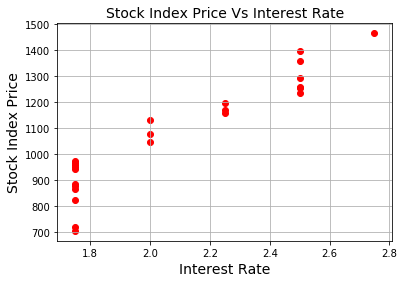

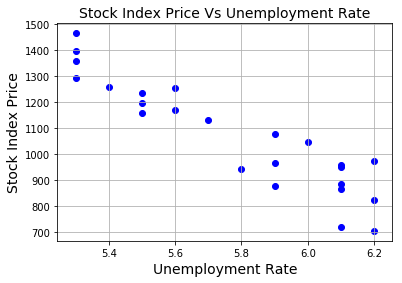

In [3]:
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='blue')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

• Stock Index vs Interest Rate graph shows that there is positive linear relationship between the Stock Index Price and the Interest Rate (when interest rates rise, the index price follows)


• Stock Index vs Unemployment rate grpah shows that there is a negative linear relationship between the Stock Index Price and the unemployment rate (when unemployement rate rises, the index prices falls)

### Performing Multiple Linear Regression

Stock_Index_Price = (Intercept) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2


In [4]:
#two variables for the multiple regression
X = df[['Interest_Rate','Unemployment_Rate']]
Y = df['Stock_Index_Price']
#with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.50
New_Unemployment_Rate = 4.0
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1661.66790967]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           4.04e-11
Time:                        14:42:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
root.mainloop()

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Interest_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Unemployment_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend() 
ax4.set_xlabel('Unemployment_Rate')
ax4.set_title('Unemployment_Rate Vs. Stock Index Price')

root.mainloop()